In [66]:
# Data processing
import numpy as np
import pandas as pd
import scipy as sp

# For visulalization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 200
print("\nDisplay settings completed\n" + '-'*25 )

# Ignore warnings
import  warnings
warnings.filterwarnings('ignore')
print("\nWarnings are ignored\n" + '-'*25 )


from sklearn import model_selection, metrics

import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV



Display settings completed
-------------------------

Warnings are ignored
-------------------------


In [67]:
### Read the prepared datasets
data_path = '/Users/Shankar/PGMS/PYTHON/data/AV/Mckinsey_Insurance/'
rand_st = 101
cust_n_jobs = -1

train_df = pd.read_csv(data_path + 'base_train_df.csv')
test_df = pd.read_csv(data_path + 'base_test_df.csv')

train_df.head()
test_df.head()

id_col = 'id'
target_col = 'renewal'
# to_drop_col = [id_col, target_col, 'age_in_days', 'residence_area_type', 'sourcing_channel', 'Income', 'premium']
# to_drop_col = [id_col, target_col, 'age_in_days', 'residence_area_type', 'sourcing_channel', 'Income', 'premium', 'appl_underwrite_score']
# to_drop_col = [id_col, target_col, 'age_in_days', 'residence_area_type', 'sourcing_channel', 'Income', 'premium', 'appl_underwrite_score', 'Age_yrs', 'age_bands']
to_drop_col = [id_col, target_col, 
                'scaled_Income', 'scaled_premium', 'scaled_Age_yrs', 'scaled_appl_score'
                             ] 

predictors = [col for col in train_df.columns if col not in to_drop_col]
predictors

## Train/val splits
X_train_all, X_val_all, y_train, y_val = model_selection.train_test_split(train_df, 
                                                                    train_df[target_col], test_size=0.2, random_state=rand_st)

X_train = X_train_all[predictors]
X_val = X_val_all[predictors]
X_test = test_df[predictors]

X_train.head()

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,355060,12058,99.02,1,0,1,0,0,110936,13,0.429,3300,1.0,0.003668,0.991377,0.035714,0.0,0.0,0.0,33,0.146341,0.009294,0,13,1,0.000000,1,0,0
1,315150,21546,99.89,1,0,0,0,0,41492,21,0.010,18000,1.0,0.003226,1.000000,0.285714,0.0,0.0,0.0,59,0.463415,0.057116,0,21,1,0.000000,4,0,2
2,84140,17531,98.69,0,0,1,0,0,31300,7,0.917,3300,0.0,0.000666,0.988106,0.035714,2.0,3.0,1.0,48,0.329268,0.039220,6,13,1,0.461538,3,0,0
3,250510,15341,99.57,1,0,0,0,0,19415,9,0.049,9600,1.0,0.002510,0.996828,0.142857,0.0,0.0,0.0,42,0.256098,0.038322,0,9,0,0.000000,2,0,1
4,198680,31400,99.87,1,1,0,0,0,99379,12,0.052,9600,1.0,0.001935,0.999802,0.142857,0.0,0.0,0.0,86,0.792683,0.048319,0,12,1,0.000000,7,0,1


,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,51150,27384,99.89,0,0,0,0,0,649,7,0.001,3300,NaN,0.000301,1.000000,0.035714,0.0,0.0,0.0,75,0.658537,0.064516,0,7,0,0.000000,6,0,0
1,285140,23735,98.93,1,0,0,0,0,81136,19,0.124,11700,NaN,0.002894,0.990485,0.178571,0.0,0.0,0.0,65,0.536585,0.041032,0,19,1,0.000000,5,0,1
2,186030,17170,-1.00,1,1,0,0,0,70762,2,1.000,11700,NaN,0.001795,0.000000,0.178571,0.0,0.0,0.0,47,0.317073,0.062893,0,2,0,0.000000,3,0,1
3,123540,16068,99.00,0,1,0,0,0,53935,11,0.198,5400,NaN,0.001103,0.991179,0.071429,0.0,0.0,0.0,44,0.280488,0.043711,0,11,0,0.000000,2,0,0
4,200020,10591,99.17,0,0,0,0,0,15476,14,0.041,9600,NaN,0.001950,0.992864,0.142857,1.0,0.0,0.0,29,0.097561,0.047995,1,15,1,0.066667,0,0,1


['Income',
 'age_in_days',
 'appl_underwrite_score',
 'area_type_Urban',
 'channel_B',
 'channel_C',
 'channel_D',
 'channel_E',
 'no_of_premiums_paid',
 'prem_paid_perc',
 'premium',
 'six_mth_late_cnt',
 'twelve_mth_late_cnt',
 'year_mth_late_cnt',
 'Age_yrs',
 'premium_perc',
 'total_late_cnt',
 'policy_age_mth',
 'policy_yr_old',
 'policy_late_pcnt',
 'age_bands',
 'Income_bands',
 'premium_bands']

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,no_of_premiums_paid,prem_paid_perc,premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
41369,66090,21546,99.17,1,0,0,0,0,6,0.981,5700,0.0,0.0,0.0,59,0.086246,0,6,0,0.0,4,0,0
26402,88630,23736,99.05,0,1,0,0,0,10,0.065,7500,0.0,0.0,0.0,65,0.084621,0,10,0,0.0,5,0,1
24366,67640,20449,97.44,1,0,0,0,0,5,0.537,1200,0.0,0.0,0.0,56,0.017741,0,5,0,0.0,4,0,0
2494,270080,22277,99.45,0,0,1,0,0,14,0.043,32700,0.0,0.0,0.0,61,0.121075,0,14,1,0.0,4,0,5
19739,216150,16436,98.63,0,0,0,1,0,8,0.015,7500,0.0,0.0,0.0,45,0.034698,0,8,0,0.0,2,0,1


In [68]:
import math
from collections import defaultdict

def func1(x, limit):
    return (((limit/100)*x['premium']) if (((limit/100)*x['premium']) < x['incentives_actual']) else x['incentives_actual'])

def get_total_net_revenue(pred_test_df, max_prop=17, incentive_limits = range(0,45,5), max_incentive=1200):
    pred_test_df['delta_perc_limited'] = pred_test_df['delta_perc'].apply(lambda x: max_prop if x > max_prop else x)
    
    for limit in incentive_limits:
        pred_test_df['temp_incentive'] = pred_test_df[['premium','incentives_actual']].apply(lambda x: func1(x, limit), axis=1)
        total_net_revenue = sum(((pred_test_df['renewal_pred'] + pred_test_df['delta_perc_limited'])*pred_test_df['premium']) - pred_test_df['temp_incentive'])
        pred_test_df['temp_incentive']
        print('Limit = {0} % and total_net_revenue is {1}'.format(limit, total_net_revenue))

### -----------------
### min =0; max = 17% ; Restrict to give incentive only when renewal perc is < 95%
### -----------------
def get_incentives(needed_perc):
    if (needed_perc <= 0):   ## NO restriction
        return 0
    elif needed_perc >= max_prop:
        needed_perc = max_prop
        
    min_needed_index = np.min(np.where(calc_prop_array >= needed_perc))
    min_needed_incentive_amt = calc_incentives[min_needed_index]
#     print('For {0} % , we can give {1}'.format(needed_perc, min_needed_incentive_amt))
        
    return(min_needed_incentive_amt)


def incentive_preparation():
    max_incentive_amt = 1300  ## No much improvement in %, after this incentive

    incentive_range=range(50,max_incentive_amt+50,50)
    incentive_dict = defaultdict(np.float)
    calc_incentives = []
    calc_effort = []
    calc_prop = []


    for amt in incentive_range:
        effort_incentive = 10*(1-math.exp(-amt/400))
        prob_effort = 20*(1-math.exp(-effort_incentive/5))
        calc_incentives.append(amt)
        calc_effort.append(effort_incentive)
        calc_prop.append(prob_effort/100)
        
    return((calc_incentives, calc_prop))


(calc_incentives, calc_prop) = incentive_preparation()
calc_prop_array = np.asarray(calc_prop)
max_prop = np.max(calc_prop_array)
calc_prop_array
max_prop


## Test
get_incentives(.050)

# get_total_net_revenue(pred_test_df, max_prop=max_prop) #364340450
# def func1(x):
#     return ((5/100)*x['premium']) if (((5/100)*x['premium']) < x['incentives']) else x['incentives']

# pred_test_df[['premium','incentives']].apply(lambda x: func1(x), axis =1)

array([ 0.04188681,  0.07150128,  0.09299282,  0.10895274,  0.12104799,
        0.1303801 ,  0.13769502,  0.14350929,  0.14818797,  0.15199395,
        0.15511981,  0.15770886,  0.15986934,  0.16168409,  0.16321731,
        0.16451933,  0.16563003,  0.16658129,  0.16739889,  0.16810378,
        0.16871318,  0.16924129,  0.16969994,  0.17009901])

0.17009901259937166

100

[1]	valid_0's auc: 0.829284
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.833354
[3]	valid_0's auc: 0.83676
[4]	valid_0's auc: 0.837055
[5]	valid_0's auc: 0.836881
[6]	valid_0's auc: 0.838708
[7]	valid_0's auc: 0.839824
[8]	valid_0's auc: 0.840068
[9]	valid_0's auc: 0.839847
[10]	valid_0's auc: 0.840652
[11]	valid_0's auc: 0.840797
[12]	valid_0's auc: 0.841338
[13]	valid_0's auc: 0.841026
[14]	valid_0's auc: 0.841621
[15]	valid_0's auc: 0.841314
[16]	valid_0's auc: 0.841517
[17]	valid_0's auc: 0.841868
[18]	valid_0's auc: 0.842089
[19]	valid_0's auc: 0.841682
[20]	valid_0's auc: 0.841707
[21]	valid_0's auc: 0.841656
[22]	valid_0's auc: 0.841933
[23]	valid_0's auc: 0.841827
[24]	valid_0's auc: 0.841643
[25]	valid_0's auc: 0.841085
[26]	valid_0's auc: 0.841401
[27]	valid_0's auc: 0.841467
[28]	valid_0's auc: 0.841578
[29]	valid_0's auc: 0.841639
[30]	valid_0's auc: 0.841663
[31]	valid_0's auc: 0.841618
[32]	valid_0's auc: 0.841547
[33]	valid_0's auc:

[292]	valid_0's auc: 0.848625
[293]	valid_0's auc: 0.848618
[294]	valid_0's auc: 0.848681
[295]	valid_0's auc: 0.848708
[296]	valid_0's auc: 0.84872
[297]	valid_0's auc: 0.84875
[298]	valid_0's auc: 0.848733
[299]	valid_0's auc: 0.848746
[300]	valid_0's auc: 0.848731
[301]	valid_0's auc: 0.848706
[302]	valid_0's auc: 0.848722
[303]	valid_0's auc: 0.848739
[304]	valid_0's auc: 0.848727
[305]	valid_0's auc: 0.848743
[306]	valid_0's auc: 0.84877
[307]	valid_0's auc: 0.848784
[308]	valid_0's auc: 0.848771
[309]	valid_0's auc: 0.848768
[310]	valid_0's auc: 0.84879
[311]	valid_0's auc: 0.848819
[312]	valid_0's auc: 0.848842
[313]	valid_0's auc: 0.848835
[314]	valid_0's auc: 0.848834
[315]	valid_0's auc: 0.848851
[316]	valid_0's auc: 0.84889
[317]	valid_0's auc: 0.84889
[318]	valid_0's auc: 0.848879
[319]	valid_0's auc: 0.848956
[320]	valid_0's auc: 0.849008
[321]	valid_0's auc: 0.849011
[322]	valid_0's auc: 0.848999
[323]	valid_0's auc: 0.848981
[324]	valid_0's auc: 0.849007
[325]	valid_0's 

[604]	valid_0's auc: 0.848542
[605]	valid_0's auc: 0.848532
[606]	valid_0's auc: 0.848547
[607]	valid_0's auc: 0.848558
[608]	valid_0's auc: 0.848581
[609]	valid_0's auc: 0.848606
[610]	valid_0's auc: 0.84862
[611]	valid_0's auc: 0.848634
[612]	valid_0's auc: 0.848633
[613]	valid_0's auc: 0.848595
[614]	valid_0's auc: 0.848543
[615]	valid_0's auc: 0.848554
[616]	valid_0's auc: 0.848546
[617]	valid_0's auc: 0.848535
Early stopping, best iteration is:
[417]	valid_0's auc: 0.849341


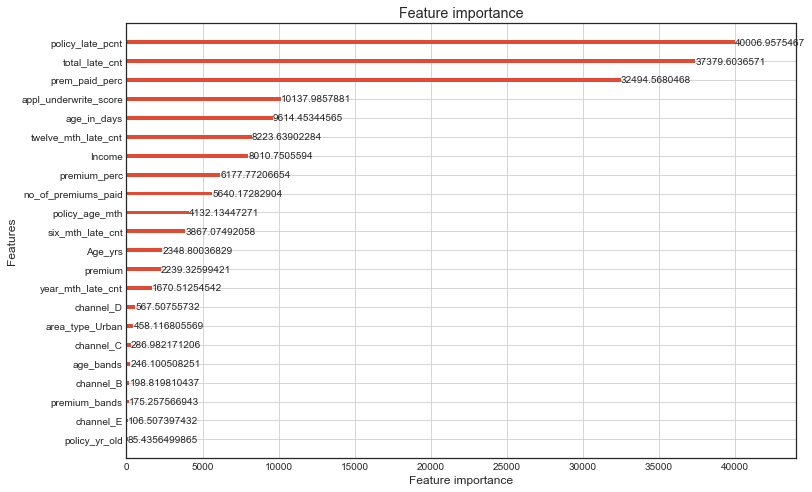

In [69]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 70,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
#     'colsample_by_tree':0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': 1, 
   'min_data_in_leaf': 10, 
   'max_depth' : 5,
#      'categorical_feature' : [ 'name:area_type_Urban', 'channel_B', 'channel_C', 'channel_D', 'channel_E',  'policy_yr_old',
#  'age_bands', 'Income_bands', 'premium_bands']
    
#     'early_stopping_round': 200, 
#     'num_iterations' : 1000
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
#                 feval=exp_met,
                early_stopping_rounds=200)

lgb.plot_importance(gbm,importance_type='gain')

## Parameter tunings

## Test dataset predictions

In [110]:
### Prediction for test datasets by different XGB methods
## combined_avg_pred_xgb_lgb   ## From ensemble section

### Create renewal predictions df
subm_df = pd.DataFrame()
subm_df['id'] = test_df['id']
subm_df['renewal'] = combined_avg_pred_xgb_lgb
subm_df['incentives_actual'] = 0

### Create incentive predictions df
prem_limit_incentive = 100
subm_df['delta_perc'] = (1 - subm_df['renewal'])
subm_df['incentives_actual'] = subm_df['delta_perc'].apply(get_incentives)
pred_test_df = pd.merge(subm_df, test_df, on='id', how='right', suffixes=('_pred', '_orig'))
pred_test_df['incentives_limited'] = pred_test_df[['premium','incentives_actual']].apply(lambda x: func1(x, prem_limit_incentive), axis=1)

pred_test_df.loc[pred_test_df['incentives_limited'] != pred_test_df['incentives_actual'], :]
subm_df['incentives'] = pred_test_df['incentives_limited'] + 350
# subm_df['incentives'] = pred_test_df['incentives_actual']
subm_df.head()
subm_df.info()

# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'day3_3_ens_xgb_lgb.csv', index=False) ## 0.7207
# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'day3_4_ens_xgb_lgb.csv', index=False) ## 0.7207
# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'subm_day3_6_ens_xgb_lgb.csv', index=False) ## 0.7251
# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'subm_day3_7_ens_xgb_lgb.csv', index=False) ## 0.723
subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'subm_day3_9_ens_xgb_lgb.csv', index=False) ## 0.7248



,id,renewal_pred,incentives_actual,delta_perc,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,no_of_premiums_paid,prem_paid_perc,premium,renewal_orig,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands,incentives_limited


,id,renewal,incentives_actual,delta_perc,incentives
0,649,0.986445,50,0.013555,400
1,81136,0.977056,50,0.022944,400
2,70762,0.839330,700,0.160670,1050
3,53935,0.971813,50,0.028187,400
4,15476,0.953719,100,0.046281,450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 5 columns):
id                   34224 non-null int64
renewal              34224 non-null float64
incentives_actual    34224 non-null int64
delta_perc           34224 non-null float64
incentives           34224 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


In [27]:
sum(test_df['premium'])
max_prop
# pred_test_df['delta_perc'].apply(lambda x: max_prop if x > max_prop else x)

370807500

0.17009901259937166

## Rough work

In [35]:
pd.cut(subm_df['renewal'],10).value_counts().sort_index()

# pd.cut(subm_df['renewal'],10).sort_index()

import math
from collections import defaultdict
incentive_amt = 1200

incentive_range=range(50,1300,50)
incentive_dict = defaultdict(np.float)
calc_incentives = []
calc_effort = []
calc_prob = []


for amt in incentive_range:
    effort_incentive = 10*(1-math.exp(-amt/400))
    prob_effort = 20*(1-math.exp(-effort_incentive/5))
    calc_incentives.append(amt)
    calc_effort.append(effort_incentive)
    calc_prob.append(prob_effort)

calc_incentives
calc_effort
calc_prob

len_calc_prob = len(calc_prob)

calc_prob_tuples = []
for i in range(0, len_calc_prob-1):
    calc_prob_tuples.append((calc_prob[i], calc_prob[i+1]))

calc_prob_tuples


(0.179, 0.261]       26
(0.261, 0.342]       96
(0.342, 0.423]      126
(0.423, 0.504]      218
(0.504, 0.584]      260
(0.584, 0.665]      407
(0.665, 0.746]      672
(0.746, 0.827]     1170
(0.827, 0.908]     3036
(0.908, 0.988]    28213
Name: renewal, dtype: int64

## ensemble LGB

In [71]:
## Base LGB run
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgb_params1 = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 70,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
#     'colsample_by_tree':0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
#     'verbose': 100, 
   'min_data_in_leaf': 10, 
   'max_depth' : 5,
}


ens_subm_lgb1 = pd.DataFrame()
for idx, curr_seed in enumerate(range(1000,100000,1357)):
    print('[{0}] Processing for seed: {1}'.format(idx, curr_seed))
    col_name = 'lgb_{0}'.format(idx)
    if idx == 10:
        break
        
    lgb_params1['feature_fraction_seed'] =  curr_seed
#     lgb_params1['bagging_fraction_seed'] = round(np.random.rand()*curr_seed)
    lgb_params1['lambda_l1'] = 10 ** (np.random.rand() * 4)
    lgb_params1['lambda_l2'] = 10 ** (np.random.rand() * 3 + 2)   
        
    lgb1 = lgb.train(lgb_params1, lgb_train, num_boost_round=5000, valid_sets=lgb_eval, early_stopping_rounds=200, verbose_eval=500)
    ens_subm_lgb1[col_name] = lgb1.predict(X_test)
    
ens_subm_lgb1.head(20)

[0] Processing for seed: 1000
Training until validation scores don't improve for 200 rounds.
[500]	valid_0's auc: 0.843595
[1000]	valid_0's auc: 0.847221
[1500]	valid_0's auc: 0.847726
[2000]	valid_0's auc: 0.84814
[2500]	valid_0's auc: 0.848429
[3000]	valid_0's auc: 0.848655
[3500]	valid_0's auc: 0.848932
[4000]	valid_0's auc: 0.849195
[4500]	valid_0's auc: 0.849283
[5000]	valid_0's auc: 0.849368
[1] Processing for seed: 2357
Training until validation scores don't improve for 200 rounds.
[500]	valid_0's auc: 0.845462
[1000]	valid_0's auc: 0.847632
[1500]	valid_0's auc: 0.848163
[2000]	valid_0's auc: 0.848583
[2500]	valid_0's auc: 0.848793
Early stopping, best iteration is:
[2762]	valid_0's auc: 0.848973
[2] Processing for seed: 3714
Training until validation scores don't improve for 200 rounds.
[500]	valid_0's auc: 0.843736
[1000]	valid_0's auc: 0.847092
[1500]	valid_0's auc: 0.847754
[2000]	valid_0's auc: 0.848136
[2500]	valid_0's auc: 0.84847
[3000]	valid_0's auc: 0.848761
[3500]	va

,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,lgb_9
0,0.990868,0.990782,0.990877,0.868872,0.978487,0.981673,0.903901,0.990340,0.834075,0.932137
1,0.983701,0.984320,0.984196,0.868872,0.977803,0.979789,0.903901,0.984630,0.834075,0.932137
2,0.842525,0.855504,0.846071,0.855156,0.855564,0.854991,0.857061,0.856829,0.833973,0.858307
3,0.979996,0.979435,0.979127,0.868872,0.978849,0.980637,0.903901,0.979313,0.834075,0.932137
4,0.973529,0.971834,0.973236,0.868872,0.960198,0.962424,0.903901,0.972669,0.834075,0.926703
5,0.990961,0.990616,0.990872,0.868872,0.978694,0.982253,0.903901,0.990592,0.834075,0.932137
6,0.763921,0.768792,0.765917,0.709775,0.758225,0.747617,0.704626,0.759714,0.706131,0.737853
7,0.821039,0.814635,0.811097,0.801089,0.825922,0.802194,0.813448,0.802805,0.791807,0.830363
8,0.993485,0.992545,0.992925,0.868872,0.979375,0.983123,0.903901,0.992232,0.834075,0.932137
9,0.992447,0.991971,0.992257,0.868872,0.979403,0.983209,0.903901,0.992019,0.834075,0.932137


In [52]:
def combine_avg_models(df):
    return np.mean(df, axis=1)

In [75]:
# del ens_subm_lgb1['lgb_8']
ens_subm_lgb1.head()

,lgb_0,lgb_1,lgb_2,lgb_4,lgb_5,lgb_7,lgb_9
0,0.990868,0.990782,0.990877,0.978487,0.981673,0.990340,0.932137
1,0.983701,0.984320,0.984196,0.977803,0.979789,0.984630,0.932137
2,0.842525,0.855504,0.846071,0.855564,0.854991,0.856829,0.858307
3,0.979996,0.979435,0.979127,0.978849,0.980637,0.979313,0.932137
4,0.973529,0.971834,0.973236,0.960198,0.962424,0.972669,0.926703


In [76]:
### Combine XGB and LGB ensembles
# xgb1_ens_df = pd.read_csv(data_path + 'day3_2_fullpred.csv')
xgb1_ens_df = pd.read_csv(data_path + 'day3_6_xgb_fullpred.csv')

xgb1_ens_df.info()
xgb1_ens_df.head()

all_pred_xgb1_lgb1 = pd.concat([xgb1_ens_df,ens_subm_lgb1], axis=1 )
all_pred_xgb1_lgb1.head()


combined_avg_pred_xgb_lgb = combine_avg_models(all_pred_xgb1_lgb1)
combined_avg_pred_xgb_lgb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 10 columns):
col_0    34224 non-null float64
col_1    34224 non-null float64
col_2    34224 non-null float64
col_3    34224 non-null float64
col_4    34224 non-null float64
col_5    34224 non-null float64
col_6    34224 non-null float64
col_7    34224 non-null float64
col_8    34224 non-null float64
col_9    34224 non-null float64
dtypes: float64(10)
memory usage: 2.6 MB


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,0.991953,0.989927,0.988532,0.992563,0.988444,0.990679,0.993324,0.991771,0.994686,0.992528
1,0.977981,0.980616,0.976725,0.981081,0.972732,0.976235,0.981459,0.976888,0.977503,0.982157
2,0.821443,0.826721,0.833954,0.841629,0.841771,0.842601,0.811797,0.821252,0.821058,0.836596
3,0.970424,0.970543,0.971266,0.972163,0.970867,0.972171,0.971360,0.967883,0.973990,0.970667
4,0.949303,0.931067,0.948650,0.945872,0.940325,0.945306,0.957881,0.949134,0.943430,0.961660


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,lgb_0,lgb_1,lgb_2,lgb_4,lgb_5,lgb_7,lgb_9
0,0.991953,0.989927,0.988532,0.992563,0.988444,0.990679,0.993324,0.991771,0.994686,0.992528,0.990868,0.990782,0.990877,0.978487,0.981673,0.990340,0.932137
1,0.977981,0.980616,0.976725,0.981081,0.972732,0.976235,0.981459,0.976888,0.977503,0.982157,0.983701,0.984320,0.984196,0.977803,0.979789,0.984630,0.932137
2,0.821443,0.826721,0.833954,0.841629,0.841771,0.842601,0.811797,0.821252,0.821058,0.836596,0.842525,0.855504,0.846071,0.855564,0.854991,0.856829,0.858307
3,0.970424,0.970543,0.971266,0.972163,0.970867,0.972171,0.971360,0.967883,0.973990,0.970667,0.979996,0.979435,0.979127,0.978849,0.980637,0.979313,0.932137
4,0.949303,0.931067,0.948650,0.945872,0.940325,0.945306,0.957881,0.949134,0.943430,0.961660,0.973529,0.971834,0.973236,0.960198,0.962424,0.972669,0.926703


0        0.986445
1        0.977056
2        0.839330
3        0.971813
4        0.953719
5        0.983300
6        0.775450
7        0.781814
8        0.986869
9        0.986325
10       0.983309
11       0.963459
12       0.462801
13       0.948305
14       0.935950
15       0.965890
16       0.988862
17       0.552344
18       0.970020
19       0.975234
20       0.902571
21       0.909431
22       0.920845
23       0.634326
24       0.986739
25       0.957640
26       0.955831
27       0.978860
28       0.662552
29       0.983888
           ...   
34194    0.984080
34195    0.985944
34196    0.988730
34197    0.981837
34198    0.980788
34199    0.946710
34200    0.981518
34201    0.982237
34202    0.967661
34203    0.979748
34204    0.977593
34205    0.981101
34206    0.984280
34207    0.982886
34208    0.968850
34209    0.977989
34210    0.986060
34211    0.974514
34212    0.980873
34213    0.966172
34214    0.942028
34215    0.963683
34216    0.969916
34217    0.703792
34218    0

In [77]:
# all_pred_xgb1_lgb1.to_csv(data_path + 'day3_3_xgb_lgb_fullpred.csv', index=False)
# all_pred_xgb1_lgb1.to_csv(data_path + 'day3_6_xgb_lgb_fullpred.csv', index=False)

In [97]:
### Incentive analysis
test_df.head()
temp_df = pd.merge(subm_df[['id', 'renewal', 'incentives', 'delta_perc']], test_df[['id', 'premium', 'premium_bands', 'policy_late_pcnt', 'appl_underwrite_score']], how='inner', on='id',
        suffixes = ('_x', '_y'))
temp_df.info()

temp_df['incentives_250'] = temp_df['incentives'] + 250
temp_df['incentives_300'] = temp_df['incentives'] + 300
temp_df['incentives_500'] = temp_df['incentives'] + 500
temp_df['appl_underwrite_score_needed'] = temp_df['appl_underwrite_score'].apply(lambda x: 4 if x < 0 else round(100-x))

temp_df['delta_perc_round'] = round(temp_df['delta_perc']*100)
temp_df.head()
temp_df['appl_underwrite_score_needed'].value_counts()

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,51150,27384,99.89,0,0,0,0,0,649,7,0.001,3300,NaN,0.000301,1.000000,0.035714,0.0,0.0,0.0,75,0.658537,0.064516,0,7,0,0.000000,6,0,0
1,285140,23735,98.93,1,0,0,0,0,81136,19,0.124,11700,NaN,0.002894,0.990485,0.178571,0.0,0.0,0.0,65,0.536585,0.041032,0,19,1,0.000000,5,0,1
2,186030,17170,-1.00,1,1,0,0,0,70762,2,1.000,11700,NaN,0.001795,0.000000,0.178571,0.0,0.0,0.0,47,0.317073,0.062893,0,2,0,0.000000,3,0,1
3,123540,16068,99.00,0,1,0,0,0,53935,11,0.198,5400,NaN,0.001103,0.991179,0.071429,0.0,0.0,0.0,44,0.280488,0.043711,0,11,0,0.000000,2,0,0
4,200020,10591,99.17,0,0,0,0,0,15476,14,0.041,9600,NaN,0.001950,0.992864,0.142857,1.0,0.0,0.0,29,0.097561,0.047995,1,15,1,0.066667,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34224 entries, 0 to 34223
Data columns (total 8 columns):
id                       34224 non-null int64
renewal                  34224 non-null float64
incentives               34224 non-null int64
delta_perc               34224 non-null float64
premium                  34224 non-null int64
premium_bands            34224 non-null int64
policy_late_pcnt         34224 non-null float64
appl_underwrite_score    34224 non-null float64
dtypes: float64(4), int64(4)
memory usage: 2.3 MB


,id,renewal,incentives,delta_perc,premium,premium_bands,policy_late_pcnt,appl_underwrite_score,incentives_250,incentives_300,incentives_500,appl_underwrite_score_needed,delta_perc_round
0,649,0.986445,550,0.013555,3300,0,0.000000,99.89,800,850,1050,0,1.0
1,81136,0.977056,550,0.022944,11700,1,0.000000,98.93,800,850,1050,1,2.0
2,70762,0.839330,1200,0.160670,11700,1,0.000000,-1.00,1450,1500,1700,4,16.0
3,53935,0.971813,550,0.028187,5400,0,0.000000,99.00,800,850,1050,1,3.0
4,15476,0.953719,600,0.046281,9600,1,0.066667,99.17,850,900,1100,1,5.0


1    18986
0     9093
2     3681
4     1571
3      697
5      107
6       57
7       20
8       12
Name: appl_underwrite_score_needed, dtype: int64

In [108]:
# total_net_revenue_724 = sum(temp_df['incentives_250'])
# total_net_revenue_725 = sum(temp_df['incentives_300'])
# total_net_revenue_723 = sum(temp_df['incentives_500'])


total_net_revenue_724
total_net_revenue_725
total_net_revenue_723

# temp_df.groupby(['premium_bands', 'delta_perc_round']).agg({'incentives': 'mean', 'incentives_300': 'mean'})

premium_weight = range(80,220,3)
delta_weight = range(80,225,3)

def func_apply_weight(row, pw, dw):
    return ((row['premium_bands']+1) * pw) + (row['appl_underwrite_score_needed'] * dw ) + row['incentives']

# for pw in premium_weight:
#     for dw in delta_weight:
#         temp_df['new_incentive'] = temp_df.apply(lambda x: func_apply_weight(x, pw, dw), axis=1)
#         curr_tot_revenue = sum(temp_df['new_incentive'])
# #         print('Total net revenue: {0}'.format(curr_tot_revenue))
#         print('Pending net revenue: {0} % [{1}, {2}]'.format( round((total_net_revenue_725 - curr_tot_revenue)*100/total_net_revenue_725,2), pw, dw))

#     #### This looks interesting --> Pending net revenue: -0.14 % [80, 119]

temp_df['new_incentive'] = temp_df.apply(lambda x: func_apply_weight(x, 80, 119), axis=1)

sum(temp_df['new_incentive'])

temp_df['incentives_350'] = temp_df['incentives'] + 350
sum(temp_df['incentives_350'])


32474700

34185900

41030700

34233744.0

35897100

In [109]:
#### Write adjusted incentives for same renewal and same 300
temp2_df = temp_df[['id', 'renewal', 'new_incentive']]
temp2_df.columns = ['id', 'renewal', 'incentives']
temp2_df.to_csv(data_path + 'subm_day3_8_ens_xgb_lgb.csv', index=False) ## 
